In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [34]:
a = np.random.rand(1000)
b = a*a
Data = pd.DataFrame(a,columns=['x'])
Data['y'] = b
Data

,x,y
0,0.035064,0.001229
1,0.398879,0.159104
2,0.417968,0.174697
3,0.049480,0.002448
4,0.224624,0.050456
5,0.108502,0.011773
6,0.160093,0.025630
7,0.259039,0.067101
8,0.075356,0.005679
9,0.951304,0.904979


In [46]:
def preprocess(Data,max_norm=1,min_norm=0):
    #normalization
    Data = (Data - Data.min())/(Data.max() - Data.min())*(max_norm - min_norm) + min_norm
    # for i in range(len(Data.columns)):
    #     Data[Data.columns[i]] = (Data[Data.columns[i]] - Data[Data.columns[i]].mean())/Data[Data.columns[i]].std()
    #     print('standardized')
    #standardization
    #for i in range(len(Data.columns)):
    #    if Data[Data.columns[i]].std()*3 > (Data[Data.columns[i]].max()-Data[Data.columns[i]].min()):
    #        Data[Data.columns[i]] = (Data[Data.columns[i]] - Data[Data.columns[i]].mean())/Data[Data.columns[i]].std()
    #        print('standardized %d'%i)
    #    else:
    #        Data = (Data - Data.min())/(Data.max() - Data.min())*(max_norm - min_norm) + min_norm
    return Data

In [47]:
Data = pd.read_csv(r'D:\Desktop\case1_Flame.csv')
Data = preprocess(Data)

In [55]:
from sklearn.model_selection import train_test_split

initializer = tf.keras.initializers.he_normal()

X1 = Data[[Data.columns[0]]]
# X2 = Data[Data.columns[-6:-1]]
Y  = Data[[Data.columns[-1]]]

x_data, x_test, y_data, y_test = train_test_split(X1,Y, test_size=0.33, random_state=None)

x_data_index = list(x_data.index.get_values())
x_test_index = list(x_test.index.get_values())

x_data = x_data.values.tolist()
x_test = x_test.values.tolist()
y_data = y_data.values.tolist()
y_test = y_test.values.tolist()

# X1 = X1.values.tolist()
# # X2 = X2.values.tolist()
# Y  = Y.values.tolist()


# P1 = tf.ones([1,5], dtype=tf.float32)
# pre_layer = tf.matmul(X1,P1)

# W1 = tf.Variable(initializer([5,5]))
# layer1out = tf.nn.tanh(tf.matmul(pre_layer, W1))

W2 = tf.Variable(initializer([1,10]))
# b2 = tf.Variable(initializer(([5])))
layer2out = tf.nn.elu(tf.matmul(x_data, W2) )
test_layer2out = tf.nn.elu(tf.matmul(x_test, W2) )

W3 = tf.Variable(initializer([10,10]))
# b3 = tf.Variable(initializer(([5])))
layer3out = tf.nn.elu(tf.matmul(layer2out, W3))
test_layer3out = tf.nn.elu(tf.matmul(test_layer2out, W3))

W4 = tf.Variable(initializer([10,10]))
# b4 = tf.Variable(initializer(([5])))
layer4out = tf.nn.elu(tf.matmul(layer3out, W4))
test_layer4out = tf.nn.elu(tf.matmul(test_layer3out, W4))

W5 = tf.Variable(initializer([10,10]))
# b5 = tf.Variable(initializer(([5])))
layer5out = tf.nn.elu(tf.matmul(layer4out, W5))
test_layer5out = tf.nn.elu(tf.matmul(test_layer4out, W5))

W6 = tf.Variable(initializer([10,10]))
layer6out = tf.nn.elu(tf.matmul(layer5out, W6))
test_layer6out = tf.nn.elu(tf.matmul(test_layer5out, W6))

W7 = tf.Variable(initializer([10,10]))
layer7out = tf.nn.elu(tf.matmul(layer6out, W7))
test_layer7out = tf.nn.elu(tf.matmul(test_layer6out, W7))

W8 = tf.Variable(initializer([10,10]))
layer8out = tf.nn.elu(tf.matmul(layer7out, W8))
test_layer8out = tf.nn.elu(tf.matmul(test_layer7out, W8))

W9 = tf.Variable(initializer([10,10]))
layer9out = tf.nn.elu(tf.matmul(layer8out, W9))
test_layer9out = tf.nn.elu(tf.matmul(test_layer8out, W9))

W10 = tf.Variable(initializer([10,1]))
layer10out = (tf.matmul(layer9out, W10))
test_layer10out = (tf.matmul(test_layer9out, W10))


# W6 = tf.Variable(initializer([8,1]))
# layer6out = tf.matmul(layer5out, W6)
# test_layer6out = tf.matmul(test_layer5out, W6)

loss = tf.sqrt(tf.reduce_mean((tf.square(y_data - layer10out))))
loss_test = tf.sqrt(tf.reduce_mean((tf.square(y_test - test_layer10out))))
train = tf.train.AdamOptimizer(0.001).minimize(loss)

sess = tf.Session()
sess.run(tf.global_variables_initializer())
num_over = 0
for step in range(50000):
    sess.run(train)
    
    if step == 0:
        test_eval = sess.run(loss_test)
        
    if test_eval <= sess.run(loss_test):
        num_over += 1
    else:
        num_over = 0
    
    if (step+1) % 1000 == 0:
        print(step+1,'steps loss :',sess.run(loss))
        
print('training complete!')
print('loss test :',sess.run(loss_test))

1000 steps loss : 0.04897172
2000 steps loss : 0.04633536
3000 steps loss : 0.045680583
4000 steps loss : 0.04551469
5000 steps loss : 0.045563646
6000 steps loss : 0.04547636
7000 steps loss : 0.04554095
8000 steps loss : 0.04610823
9000 steps loss : 0.045472097
10000 steps loss : 0.04547884
11000 steps loss : 0.045562856
12000 steps loss : 0.045508787
13000 steps loss : 0.04564322
14000 steps loss : 0.04544293
15000 steps loss : 0.045447256
16000 steps loss : 0.04585445
17000 steps loss : 0.045448937
18000 steps loss : 0.04555415
19000 steps loss : 0.04569817
20000 steps loss : 0.045637876
21000 steps loss : 0.045422956
22000 steps loss : 0.04541578
23000 steps loss : 0.04645487
24000 steps loss : 0.04528731
25000 steps loss : 0.045254197
26000 steps loss : 0.045172427
27000 steps loss : 0.0450599
28000 steps loss : 0.044841424
29000 steps loss : 0.044468433
30000 steps loss : 0.044377696
31000 steps loss : 0.044388145
32000 steps loss : 0.044340745
33000 steps loss : 0.044335052
340

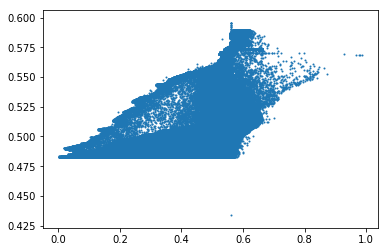

In [54]:
import matplotlib.pyplot as plt
plt.scatter(y_test, sess.run(test_layer10out),s=1)

In [8]:
%matplotlib inline

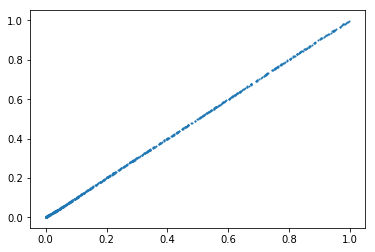

In [41]:
plt.scatter(y_data, sess.run(layer10out), s=1)

In [56]:
import seaborn as sns
Data = pd.read_csv(r'D:\Desktop\190925\new_case1_Flame.csv')

In [58]:
a = Data.corr()

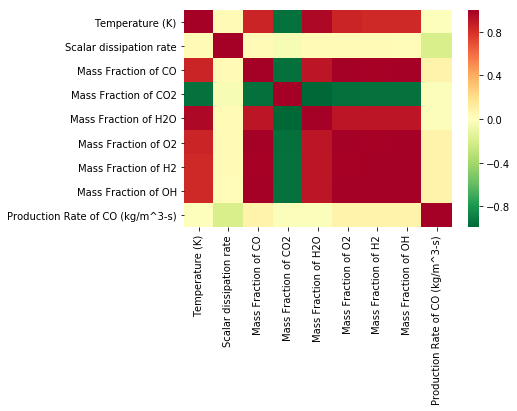

In [63]:
sns.heatmap(a,cmap='RdYlGn_r')

In [90]:
b = [[0,0.0006,0.7,0.63,0.81],
     [0.0006,0,0.71,0.84,0.67],
     [0.7,0.71,0,0.0002,0.71],
     [0.63,0.84,0.0002,0,0.63],
     [0.81,0.67,0.71,0.63,0]]


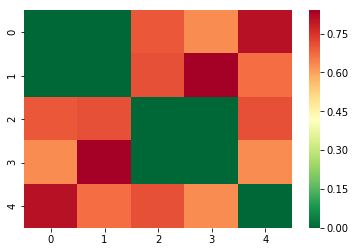

In [92]:
sns.heatmap(b,cmap='RdYlGn_r')

In [94]:
Data = pd.read_csv(r'D:\Desktop\190925\new_case2_Flame.csv')

In [95]:
print(Data.columns)
# plt.scatter(Data[Data.columns[0]],Data[Data.columns[1]])

Index(['Temperature (K)', 'Scalar dissipation rate', 'Mass Fraction of CO2',
       'Mass Fraction of H2O', 'Mass Fraction of O2', 'Mass Fraction of H2',
       'Mass Fraction of OH', 'Mass Fraction of CO'],
      dtype='object')


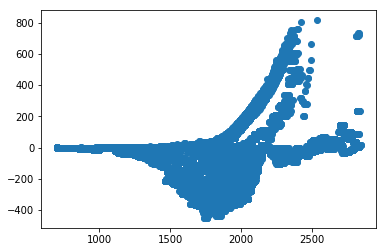

In [84]:
plt.scatter(Data[Data.columns[0]],Data[Data.columns[-1]])

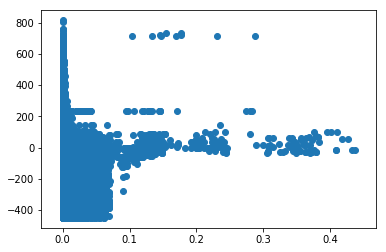

In [85]:
plt.scatter(Data[Data.columns[1]],Data[Data.columns[-1]])

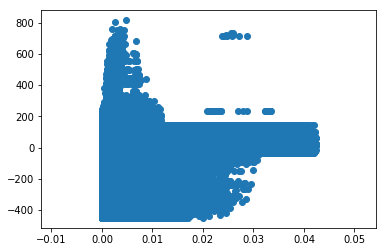

In [86]:
plt.scatter(Data[Data.columns[2]],Data[Data.columns[-1]])

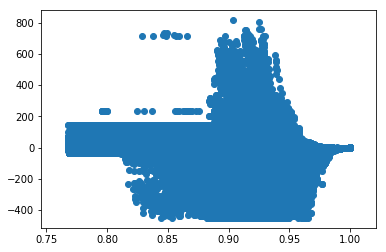

In [87]:
plt.scatter(Data[Data.columns[3]],Data[Data.columns[-1]])

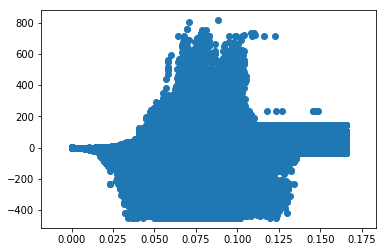

In [88]:
plt.scatter(Data[Data.columns[4]],Data[Data.columns[-1]])

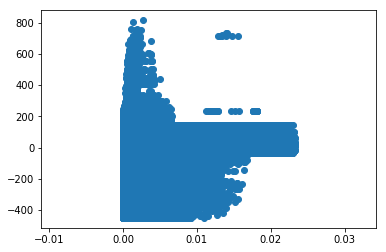

In [89]:
plt.scatter(Data[Data.columns[5]],Data[Data.columns[-1]])

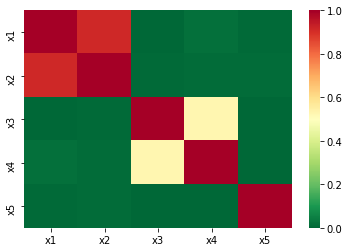

In [97]:
data = pd.read_csv(r'D:\Desktop\depend_toy.csv')
data1 = data.corr()
sns.heatmap(data1,cmap='RdYlGn_r')

In [98]:
Data = pd.read_csv(r'D:\Desktop\new_Flame.csv')
a = pd.DataFrame(Data, columns=['X (m)', 'Y (m)', 'Z (m)','Mass Fraction of CO'])
a.head()

,X (m),Y (m),Z (m),Mass Fraction of CO
0,-0.0175,-0.0015,-0.039987,0.036546
1,-0.0165,-0.0025,-0.039987,0.036540
2,-0.0145,-0.0035,-0.039987,0.036542
3,-0.0175,-0.0005,-0.039987,0.036606
4,-0.0165,-0.0015,-0.039987,0.036552


In [99]:
a.to_csv(r'D:\Desktop\190925\full_flame_contour.csv',header=True, index=False)

In [100]:
b = a[a['X (m)'] < 0]
b

,X (m),Y (m),Z (m),Mass Fraction of CO
0,-0.0175,-0.001500,-0.039987,0.036546
1,-0.0165,-0.002500,-0.039987,0.036540
2,-0.0145,-0.003500,-0.039987,0.036542
3,-0.0175,-0.000500,-0.039987,0.036606
4,-0.0165,-0.001500,-0.039987,0.036552
5,-0.0175,-0.001500,-0.039956,0.036545
6,-0.0155,-0.002500,-0.039987,0.036501
7,-0.0165,-0.002500,-0.039956,0.036539
8,-0.0135,-0.003500,-0.039987,0.036555
9,-0.0145,-0.002500,-0.039987,0.036548


In [101]:
b.to_csv(r'D:\Desktop\190925\full_flame_contour1.csv',header=True, index=False)

In [102]:
import scipy.interpolate as spi

In [103]:
data = pd.read_csv(r'D:\Desktop\190305\csvfile\new\새 폴더 (3)\0D_mean_orig_channel.csv')

In [114]:
print(max(data['Y']))
print(min(data['Y']))
print(len(data))

0.796423
0.00611369
1638


In [113]:
x = np.linspace(0.00611369,0.796423,2000000)
print(len(x))
ipo = spi.splev(data['Y'],data['Nu_t_lsq_n'])

2000000


ValueError: too many values to unpack (expected 3)